In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
)

In [80]:
df = pd.read_csv("/ExamExercises/Datasets/laptops-v1.csv")

In [81]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99


In [82]:
df["OS"].unique().shape

(3,)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                791 non-null    object 
 1   Model                791 non-null    object 
 2   Type                 791 non-null    object 
 3   Dimension (in)       717 non-null    float64
 4   Screen Resolution    791 non-null    object 
 5   CPU Brand            791 non-null    object 
 6   CPU Model            791 non-null    object 
 7   CPU Frequency (GHz)  791 non-null    float64
 8   GPU Brand            791 non-null    object 
 9   GPU Model            742 non-null    object 
 10  RAM (GB)             791 non-null    int64  
 11  HDD                  791 non-null    bool   
 12  SSD                  791 non-null    bool   
 13  OS                   791 non-null    object 
 14  Weight (kg)          742 non-null    float64
 15  Price (Euro)         781 non-null    flo

In [84]:
df.isnull().sum()

Brand                   0
Model                   0
Type                    0
Dimension (in)         74
Screen Resolution       0
CPU Brand               0
CPU Model               0
CPU Frequency (GHz)     0
GPU Brand               0
GPU Model              49
RAM (GB)                0
HDD                     0
SSD                     0
OS                      0
Weight (kg)            49
Price (Euro)           10
dtype: int64

In [85]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop(columns=["Brand"], inplace=True)

In [86]:
df.drop(columns=["Model"], inplace=True)

In [87]:
df = pd.concat([df, pd.get_dummies(df["Type"])], axis=1)
df.drop(columns=["Type"], inplace=True)

In [88]:
df[["Width", "Height"]] = df["Screen Resolution"].str.split("x").tolist()

In [89]:
df["Width"] = df["Width"].astype(int)
df["Height"] = df["Height"].astype(int)
df.drop(columns=["Screen Resolution"], inplace=True)

In [90]:
df.head()

,Dimension (in),CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,...,Acer,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook,Width,Height
0,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,...,False,False,False,True,False,False,True,False,1920,1080
1,NaN,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,...,False,True,False,False,False,False,False,True,1920,1080
2,14.0,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,...,True,False,False,False,False,False,False,True,1920,1080
3,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,...,False,False,False,True,False,False,True,False,1366,768
4,15.6,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,...,False,False,False,True,False,False,True,False,1920,1080


In [91]:
df["CPU Model"].unique()

array(['Core i5 7200U', 'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U',
       'Core i7 7500U', 'Core i3 7100U', 'Core i5 7300HQ',
       'Core i7 8650U', 'Core i3 7130U', 'Core i7 7700HQ',
       'Core i7 7560U', 'Core i5 7500U', 'Core i5 7Y54', 'Core i5 6200U',
       'Core i7 7820HK', 'Core i5 7300U', 'Core i7 7600U',
       'Core i7 6500U', 'Core i7 7820HQ', 'Core i5 7440HQ',
       'Core i7 6600U', 'Core i7 6700HQ', 'Core i3 6100U',
       'Core i7 6820HK', 'Core i5 6300U', 'Core i5 6300HQ',
       'Core i7 6820HQ', 'Core i7 7660U'], dtype=object)

In [92]:
df.drop(columns=["CPU Brand"], inplace=True)

In [93]:
df["CPU Series"] = df["CPU Model"].str[6:7].astype(int)
df.drop(columns=["CPU Model"], inplace=True)

In [94]:
df = pd.concat([df, pd.get_dummies(df["GPU Brand"])], axis=1)
df.drop(columns=["GPU Brand"], inplace=True)

In [95]:
df.drop(columns=["GPU Model"], inplace=True)

In [96]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [97]:
df.head()

,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,Dell,...,Ultrabook,Width,Height,CPU Series,AMD,Intel,Nvidia,Linux,No OS,Windows
0,15.6,2.5,8,False,True,1.86,575.00,False,False,False,...,False,1920,1080,5,False,True,False,False,True,False
1,NaN,1.8,16,False,True,1.30,1495.00,False,True,False,...,True,1920,1080,7,False,False,True,False,False,True
2,14.0,1.6,8,False,True,1.60,770.00,True,False,False,...,True,1920,1080,5,False,True,False,False,False,True
3,15.6,2.5,4,True,False,1.86,393.90,False,False,False,...,False,1366,768,5,False,True,False,False,True,False
4,15.6,2.0,4,True,False,1.86,344.99,False,False,False,...,False,1920,1080,3,False,True,False,False,True,False


In [98]:
df.isnull().sum()

Dimension (in)         74
CPU Frequency (GHz)     0
RAM (GB)                0
HDD                     0
SSD                     0
Weight (kg)            49
Price (Euro)           10
Acer                    0
Asus                    0
Dell                    0
HP                      0
Lenovo                  0
Gaming                  0
Notebook                0
Ultrabook               0
Width                   0
Height                  0
CPU Series              0
AMD                     0
Intel                   0
Nvidia                  0
Linux                   0
No OS                   0
Windows                 0
dtype: int64

<Axes: >

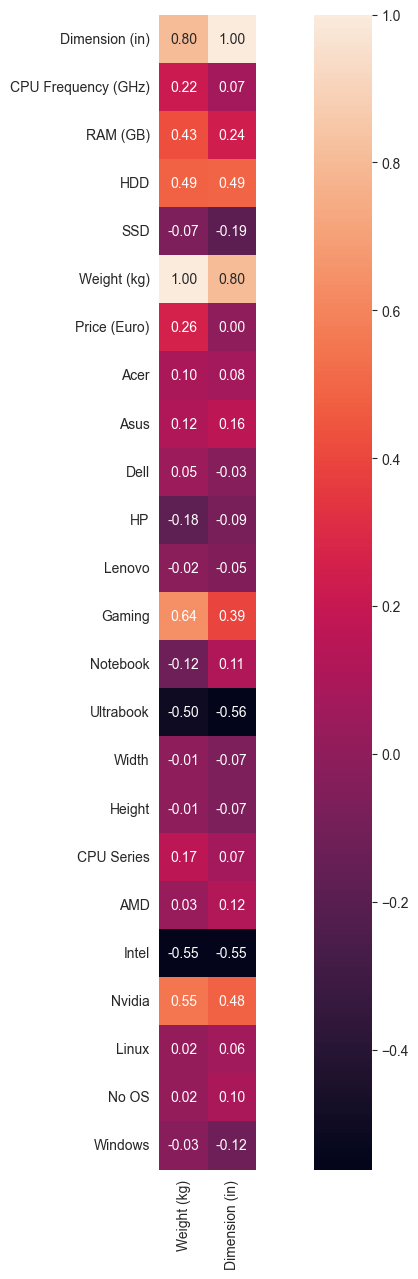

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True)[["Weight (kg)", "Dimension (in)"]], annot=True, fmt=".2f", square=True)

In [100]:
columns = ["Dimension (in)", "Weight (kg)", "Gaming", "Ultrabook", "Intel", "Nvidia"]

In [101]:
imputer = IterativeImputer()
df[columns] = imputer.fit_transform(df[columns])

In [102]:
df.isnull().sum()

Dimension (in)          0
CPU Frequency (GHz)     0
RAM (GB)                0
HDD                     0
SSD                     0
Weight (kg)             0
Price (Euro)           10
Acer                    0
Asus                    0
Dell                    0
HP                      0
Lenovo                  0
Gaming                  0
Notebook                0
Ultrabook               0
Width                   0
Height                  0
CPU Series              0
AMD                     0
Intel                   0
Nvidia                  0
Linux                   0
No OS                   0
Windows                 0
dtype: int64

In [103]:
df.dropna(subset=["Price (Euro)"], inplace=True)

In [104]:
df.isnull().sum()

Dimension (in)         0
CPU Frequency (GHz)    0
RAM (GB)               0
HDD                    0
SSD                    0
Weight (kg)            0
Price (Euro)           0
Acer                   0
Asus                   0
Dell                   0
HP                     0
Lenovo                 0
Gaming                 0
Notebook               0
Ultrabook              0
Width                  0
Height                 0
CPU Series             0
AMD                    0
Intel                  0
Nvidia                 0
Linux                  0
No OS                  0
Windows                0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 790
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dimension (in)       781 non-null    float64
 1   CPU Frequency (GHz)  781 non-null    float64
 2   RAM (GB)             781 non-null    int64  
 3   HDD                  781 non-null    bool   
 4   SSD                  781 non-null    bool   
 5   Weight (kg)          781 non-null    float64
 6   Price (Euro)         781 non-null    float64
 7   Acer                 781 non-null    bool   
 8   Asus                 781 non-null    bool   
 9   Dell                 781 non-null    bool   
 10  HP                   781 non-null    bool   
 11  Lenovo               781 non-null    bool   
 12  Gaming               781 non-null    float64
 13  Notebook             781 non-null    bool   
 14  Ultrabook            781 non-null    float64
 15  Width                781 non-null    int64  


In [106]:
X, y = df.drop(columns=["Price (Euro)"], axis=1), df["Price (Euro)"]

In [107]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
regressor = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 249.90949044585992
MAPE: 0.21660281092892
MSE: 136448.43197643314
RMSE: 369.38926889723416
R2 Score: 0.5991567850006062


In [109]:
regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 267.00523875461823
MAPE: 0.2309136305299254
MSE: 164410.25622216024
RMSE: 405.47534601028485
R2 Score: 0.5170136092560794


In [110]:
regressor = RandomForestRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 216.74223767440097
MAPE: 0.18538027504932733
MSE: 108081.66663074045
RMSE: 328.75776284483453
R2 Score: 0.6824895522270169


In [111]:
regressor = XGBRegressor(n_estimators=100).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 209.25401113716663
MAPE: 0.1784239227752056
MSE: 101124.49509111159
RMSE: 318.0007784441912
R2 Score: 0.7029275665512034


In [112]:
param_grid = {
    "n_neighbors": range(2, 10 + 1),
}

In [113]:
regressor = KNeighborsRegressor()

In [114]:
grid_search = GridSearchCV(
    regressor,
    param_grid,
    scoring="r2",
    cv=5,
)

In [115]:
grid_search.fit(train_X, train_y)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(2, 11)}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [116]:
pred_y = grid_search.predict(test_X)

In [119]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 242.68147770700637
MAPE: 0.2105879392838499
MSE: 138416.2226203312
RMSE: 372.0433074526824
R2 Score: 0.5933760258030064
